In [1]:
library(zoo)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
library(forecast)

Loading required package: timeDate
This is forecast 7.1 



In [3]:
preprocessing <- function(ts_csv, total_csv){
    
    # removes rows with low observations and locfs them
    # returns time series and total time series, as a list
    
    ts = read.csv(ts_csv)
    total <- read.csv(total_csv)
    df = data.frame(ts)
    df_total = data.frame(total)
    
    missing = df_total[,'total']<5000
    df_total[missing, 'total'] <- NA
    df[missing,] <-NA
    ts_total = ts(na.locf(df_total[,'total']))
    ts_filled = ts(na.locf(df[, ncol(df)]))
    return(list(series=ts_filled, total=ts_total))
}

In [4]:
cas = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$series, frequency=24)
look = ts(preprocessing('E:/summary/sept_looking.csv', 'E:/summary/sept_total.csv')$series, frequency=24)
ref = ts(preprocessing('E:/summary/sept_reflecting.csv', 'E:/summary/sept_total.csv')$series, frequency=24)
total = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$total, frequency=24)

In [5]:
alc = ts(preprocessing('E:/summary/sept_alc.csv', 'E:/summary/sept_total.csv')$series, frequency=24)
fpa = ts(preprocessing('E:/summary/sept_fpa.csv', 'E:/summary/sept_total.csv')$series, frequency=24)

In [6]:
library(repr)

In [7]:
options(repr.plot.width=10, repr.height=4)

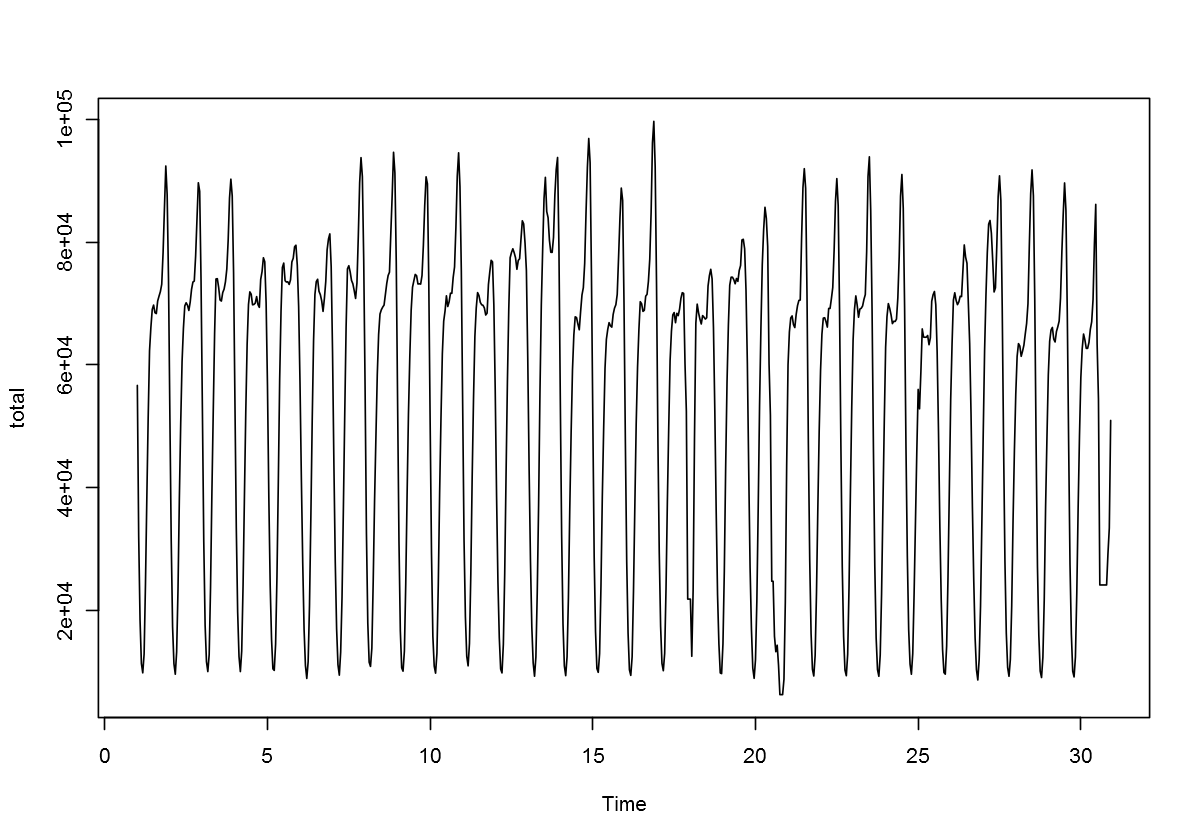

In [8]:
ts.plot(total)

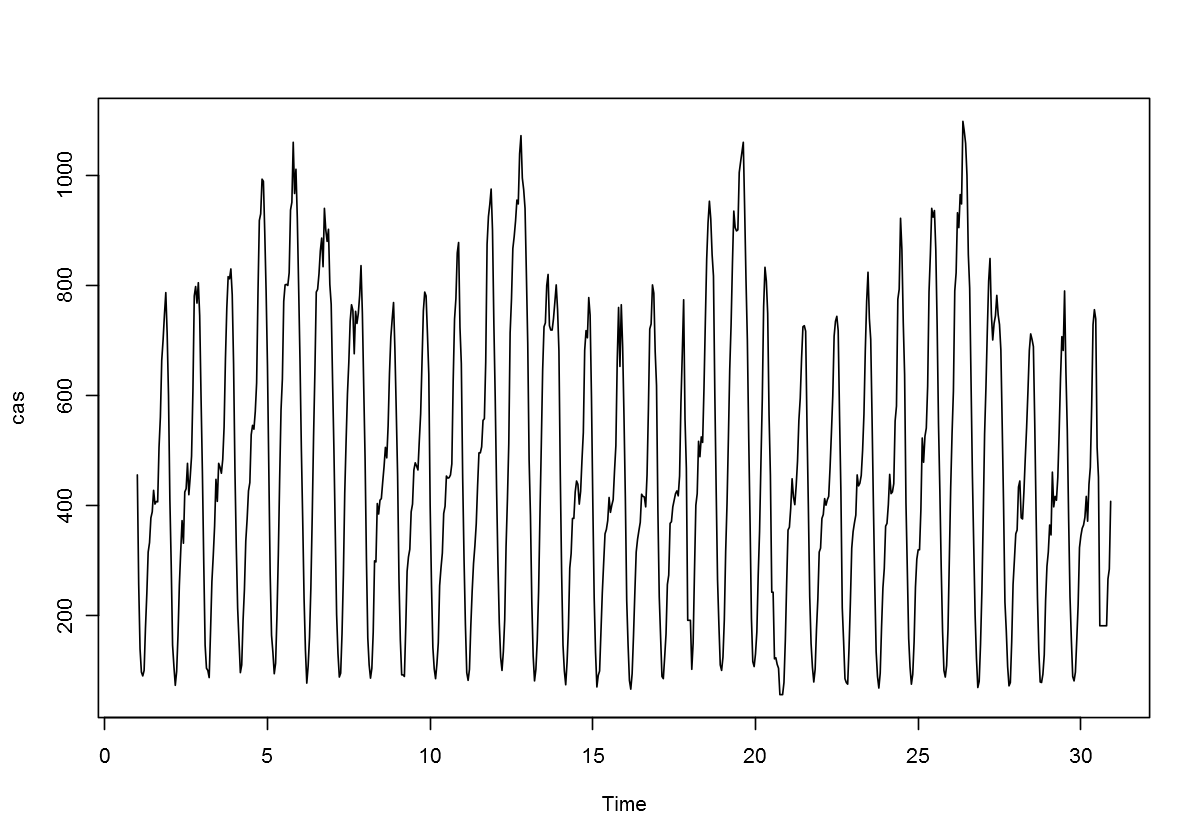

In [9]:
ts.plot(cas)

In [10]:
options(repr.plot.width=32, repr.height=4)

In [11]:
fp = cas + look + ref

In [33]:
dev.copy(png, 'fplbreakdown.png')
ts.plot(rollmean(cas/fp, 3), rollmean(look/fp,3), rollmean(ref/fp,3), col=c("red", "blue", "green"))
title(main='First Person Level Breakdown')
axis(side=1, at = c(1:30))
dev.off()

png 
  3

png 
  2

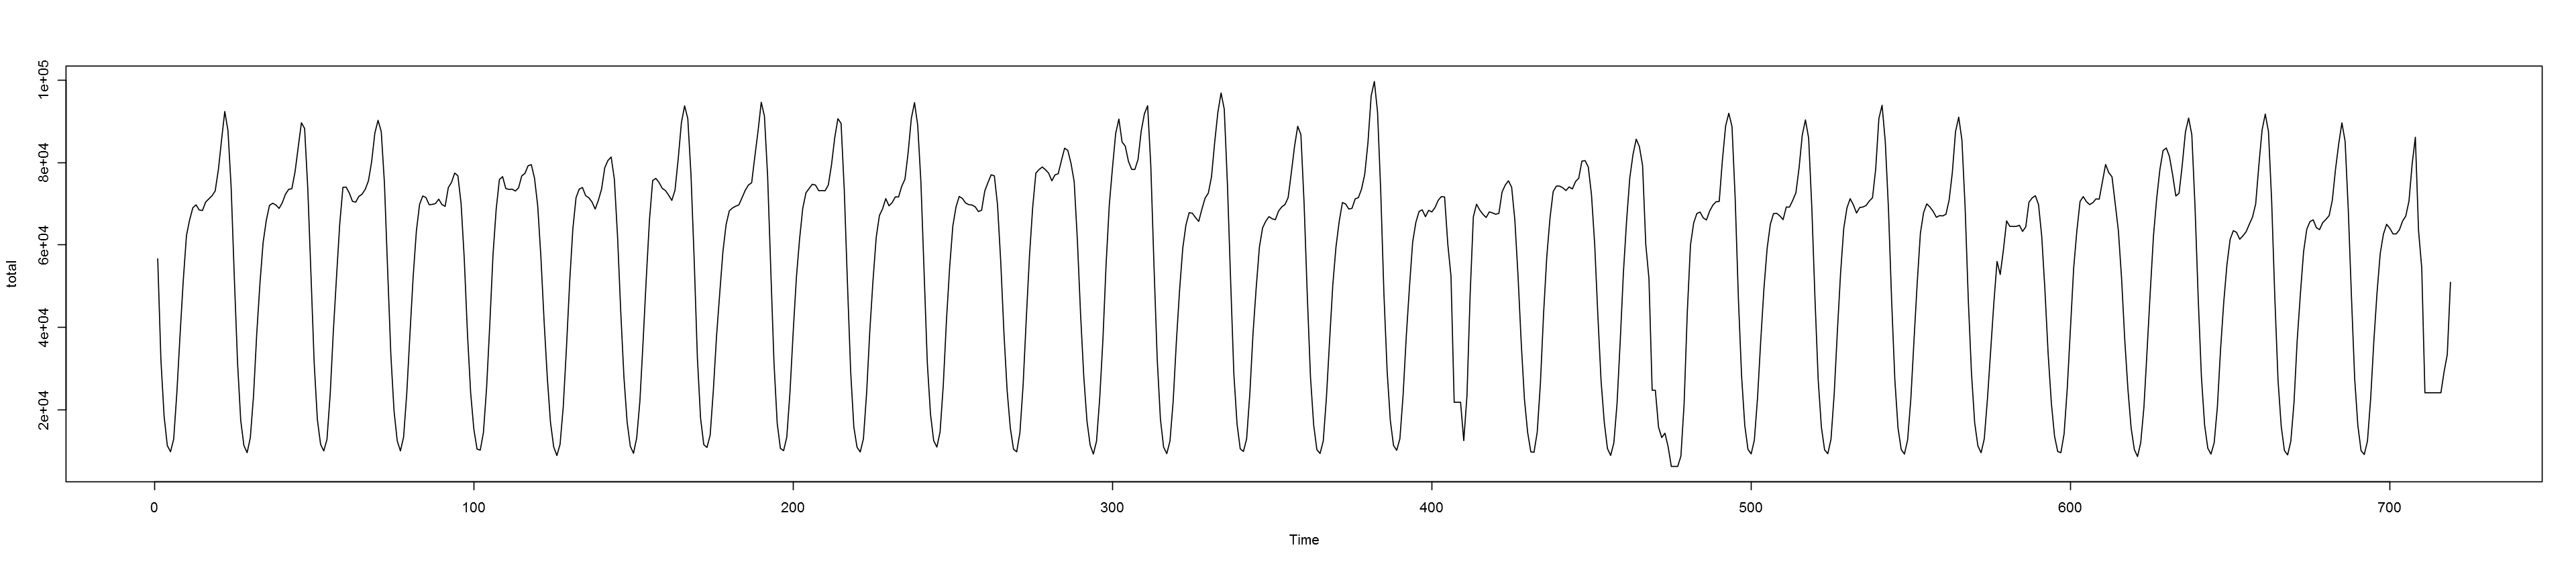

In [40]:
ts.plot(total)

In [ ]:
plot-stages(ccsv, lcsv, rcsv){
    cas = read.csv(ccsv)
    look = read.csv(lcsv)
    ref = read.csv(rcsv)
    
}